In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Zadanie 1

In [17]:
def RTable(img, threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, bin = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, np.ones((3,3)))
    bin = ~bin.astype(np.uint8)
    plt.imshow(bin, cmap='gray')
    plt.show()

    contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    plt.imshow(cv2.drawContours(img, contours , -1, (255,0,0) ))
    plt.show()

    sobelx = cv2.Sobel(bin, cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(bin,cv2.CV_64F,0,1,ksize=5)
    sobelx = sobelx/np.amax(sobelx)
    sobely = sobely/np.amax(sobely)
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = gradient/np.amax(gradient)
    plt.imshow(sobelx.astype(np.float32))
    plt.show()
    plt.imshow(sobely.astype(np.float32))
    plt.show()
    plt.imshow(gradient.astype(np.float32))
    plt.show()
    alpha = np.arctan2(sobelx,sobely)
    plt.imshow(alpha.astype(np.float32))
    plt.show()

    moments_img = cv2.moments(bin, 1)
    RTable = [[] for _ in range (360) ]
    xc, yc = (moments_img['m01']/moments_img['m00'], moments_img['m10']/moments_img['m00'] )
    for i in range(contours[0].shape[0]):
        (x,y) = contours[0][i,0,:]
        alpha_t = -np.arctan2(xc-x,yc-y)+np.pi/2
        norm = np.sqrt((xc-x)**2+(yc-y)**2)
        theta = round(alpha[x,y]*360/(2*np.pi)+90)
        RTable[theta].append((norm,alpha_t))
    
    return RTable, contours, xc, yc, gradient


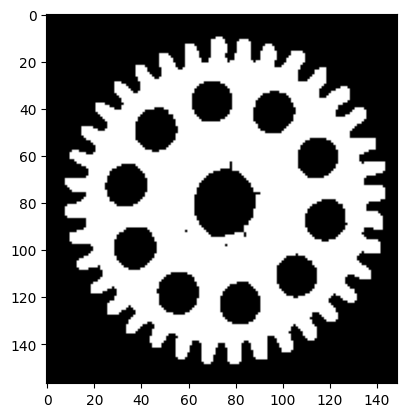

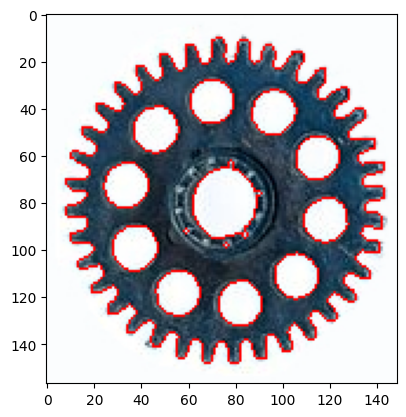

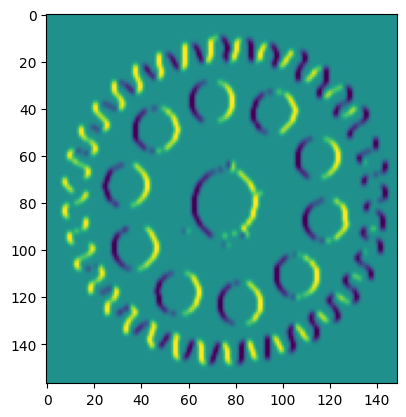

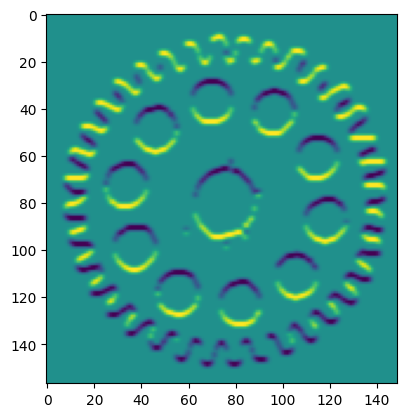

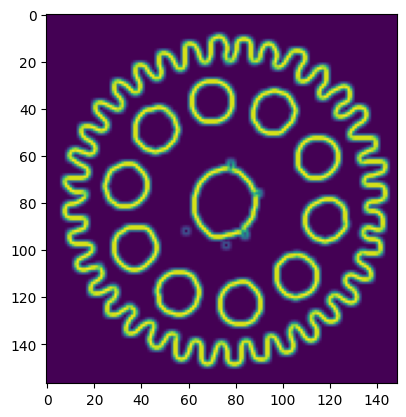

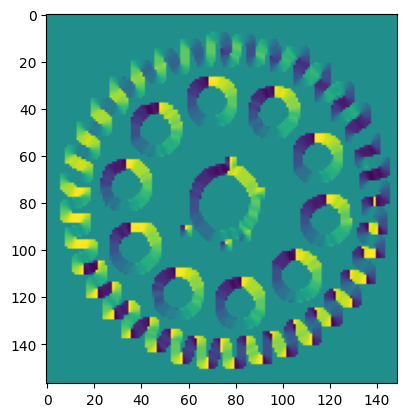

In [18]:
trybik = cv2.imread('trybik.jpg')
table, contours, xc, yc, gradient = RTable(trybik, 225)

In [21]:
def find(img, threshold, rtable, contours, xc, yc, gradient):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, bin = cv2.threshold(img_gray, threshold, 255 , cv2.THRESH_BINARY)
    bin = ~bin
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, np.ones((3,3)))
    plt.imshow(bin, cmap='gray')
    plt.show()

    hough = np.zeros(np.array(bin.shape)+40)
    sobelx = cv2.Sobel(bin, cv2 . CV_64F ,1 ,0 , ksize =5)
    sobely = cv2 . Sobel (bin, cv2 . CV_64F ,0 ,1 , ksize =5)
    sobelx = sobelx/np.amax(sobelx)
    sobely = sobely/np.amax(sobely)
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = gradient/np.amax(gradient)
    alpha = np.arctan2(sobelx,sobely)
    plt.imshow(alpha.astype(np.float32))
    plt.show()

    for i in range(gradient.shape[0]):
        for j in range(gradient.shape[1]):
            if(gradient[i,j]>0.5):
                fi = alpha[i,j]
                for pair in rtable[round(fi*360/(2*np.pi)+90)]:
                    (r, alp) = pair
                    x1 = round(r* np . cos ( alp ) + i) #+ img_.shape[0]//2
                    y1 = round(r* np . sin ( alp ) + j) #+ img_.shape[1]//2
                    hough[x1,y1] += 1
    plt.imshow(6*hough.astype(np.float32)/np.max(hough.astype(np.float32)))
    plt.show()

    # [ m_x ], [ m_y ] = np . where ( hough . max () == hough )
    temp = list(contours[0].shape)
    temp.insert(0, 1)
    # contour_temp = tuple((np.array(contours)-np.array([xc, yc])+np.array([m_x,m_y])))

    plt.imshow(img)
    max_lst = []
    for max in range(0, 4):
        temp = np.unravel_index(np.argmax(hough), hough.shape)
        max_lst.append(temp)
        hough[temp[0]-20:temp[0]+20, temp[1]-20:temp[1]+20] = 0
        plt . plot ([ temp[1] ], [ temp[0] ] ,'*', color ='r')

    plt.imshow(img)
    for (x,y) in max_lst:
        cnt = deepcopy(np.array(contours,dtype=np.ndarray))
        for i in range(cnt.shape[0]):
            for j in range(cnt[i].shape[0]):
                for k in range(cnt[i].shape[1]):
                    cnt[i][j,k,:] -= np.array([yc, xc],dtype=np.int32)-np.array([y,x],dtype=np.int32)

        cv2.drawContours( img, cnt , -1, (255,0,0) )
        plt . plot ([ y ], [ x ] ,'*', color ='r')
    plt.imshow(img)

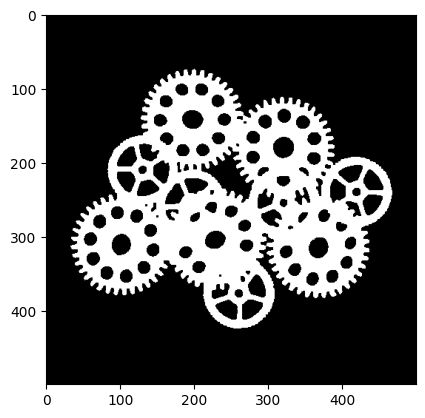

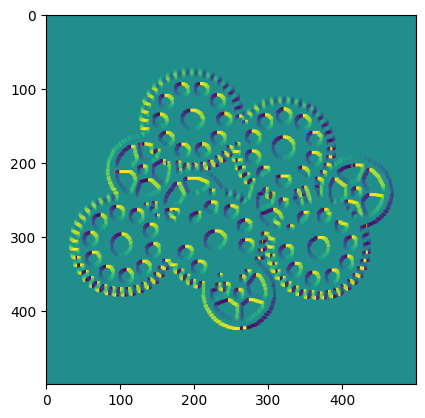

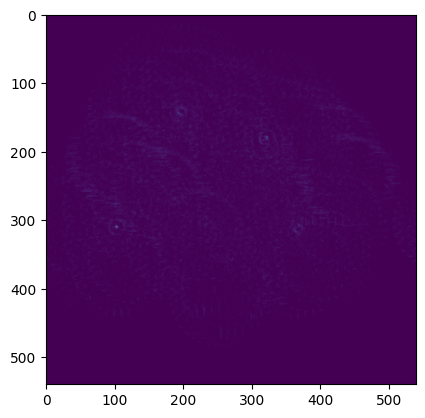

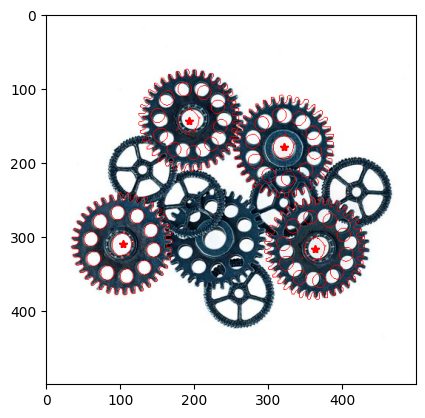

In [22]:
img2 = cv2.imread("trybiki2.jpg")
find(img2, 225, table, contours, xc, yc, gradient)